### Tutorial from CODEBASICS (ML KMeans Clustering)
https://www.youtube.com/watch?v=EItlUEPCIzM

In [26]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


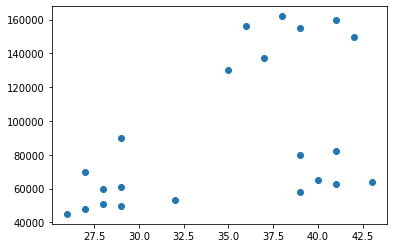

In [28]:
plt.scatter(df['Age'], df['Income($)'])

In [29]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [30]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

c:\Users\Ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [31]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


Text(0, 0.5, 'Income($)')

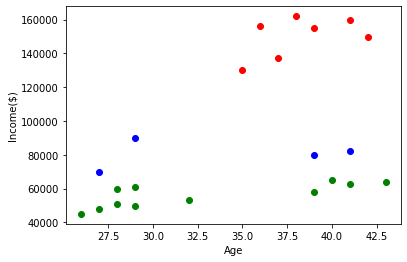

In [32]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'], color='green')
plt.scatter(df2.Age,df2['Income($)'], color ='red')
plt.scatter(df3.Age,df3['Income($)'], color ='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')


In [34]:

scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])


scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [35]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

c:\Users\Ivana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [37]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [41]:
centroids = km.cluster_centers_

Text(0, 0.5, 'Income($)')

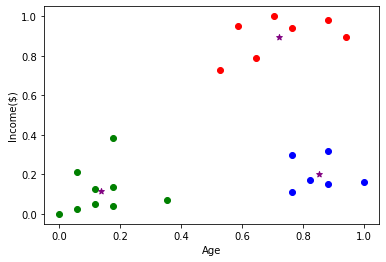

In [44]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Age'], df1['Income($)'],color='green')
plt.scatter(df2['Age'], df2['Income($)'],color='red')
plt.scatter(df3['Age'], df3['Income($)'],color='blue')

plt.scatter(centroids[:,0],centroids[:, 1], color='purple', marker='*')

plt.xlabel('Age')
plt.ylabel('Income($)')

ELBOW PLOT

In [48]:
k_rng = range(1,11)

sse = []

for k in k_rng:
    km = KMeans(n_clusters=k,n_init=1)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)


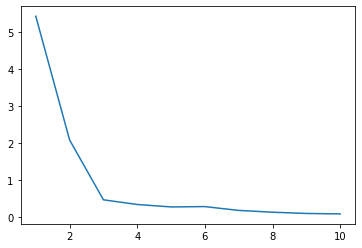

In [49]:
plt.plot(k_rng,sse)